In [1]:
from inf.pimlp import *
from tests.test_pimlp import *
from tqdm.notebook import tqdm
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
sns.set()
def tight_layout(plt):
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

In [2]:
X = torch.linspace(-np.pi, np.pi).reshape(-1, 1)
y = torch.sin(X) #.reshape(-1)
X = torch.cat([X, torch.ones_like(X)], dim=1)

In [3]:
lrs = [1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
batches = list(2**np.arange(7)) + [100]

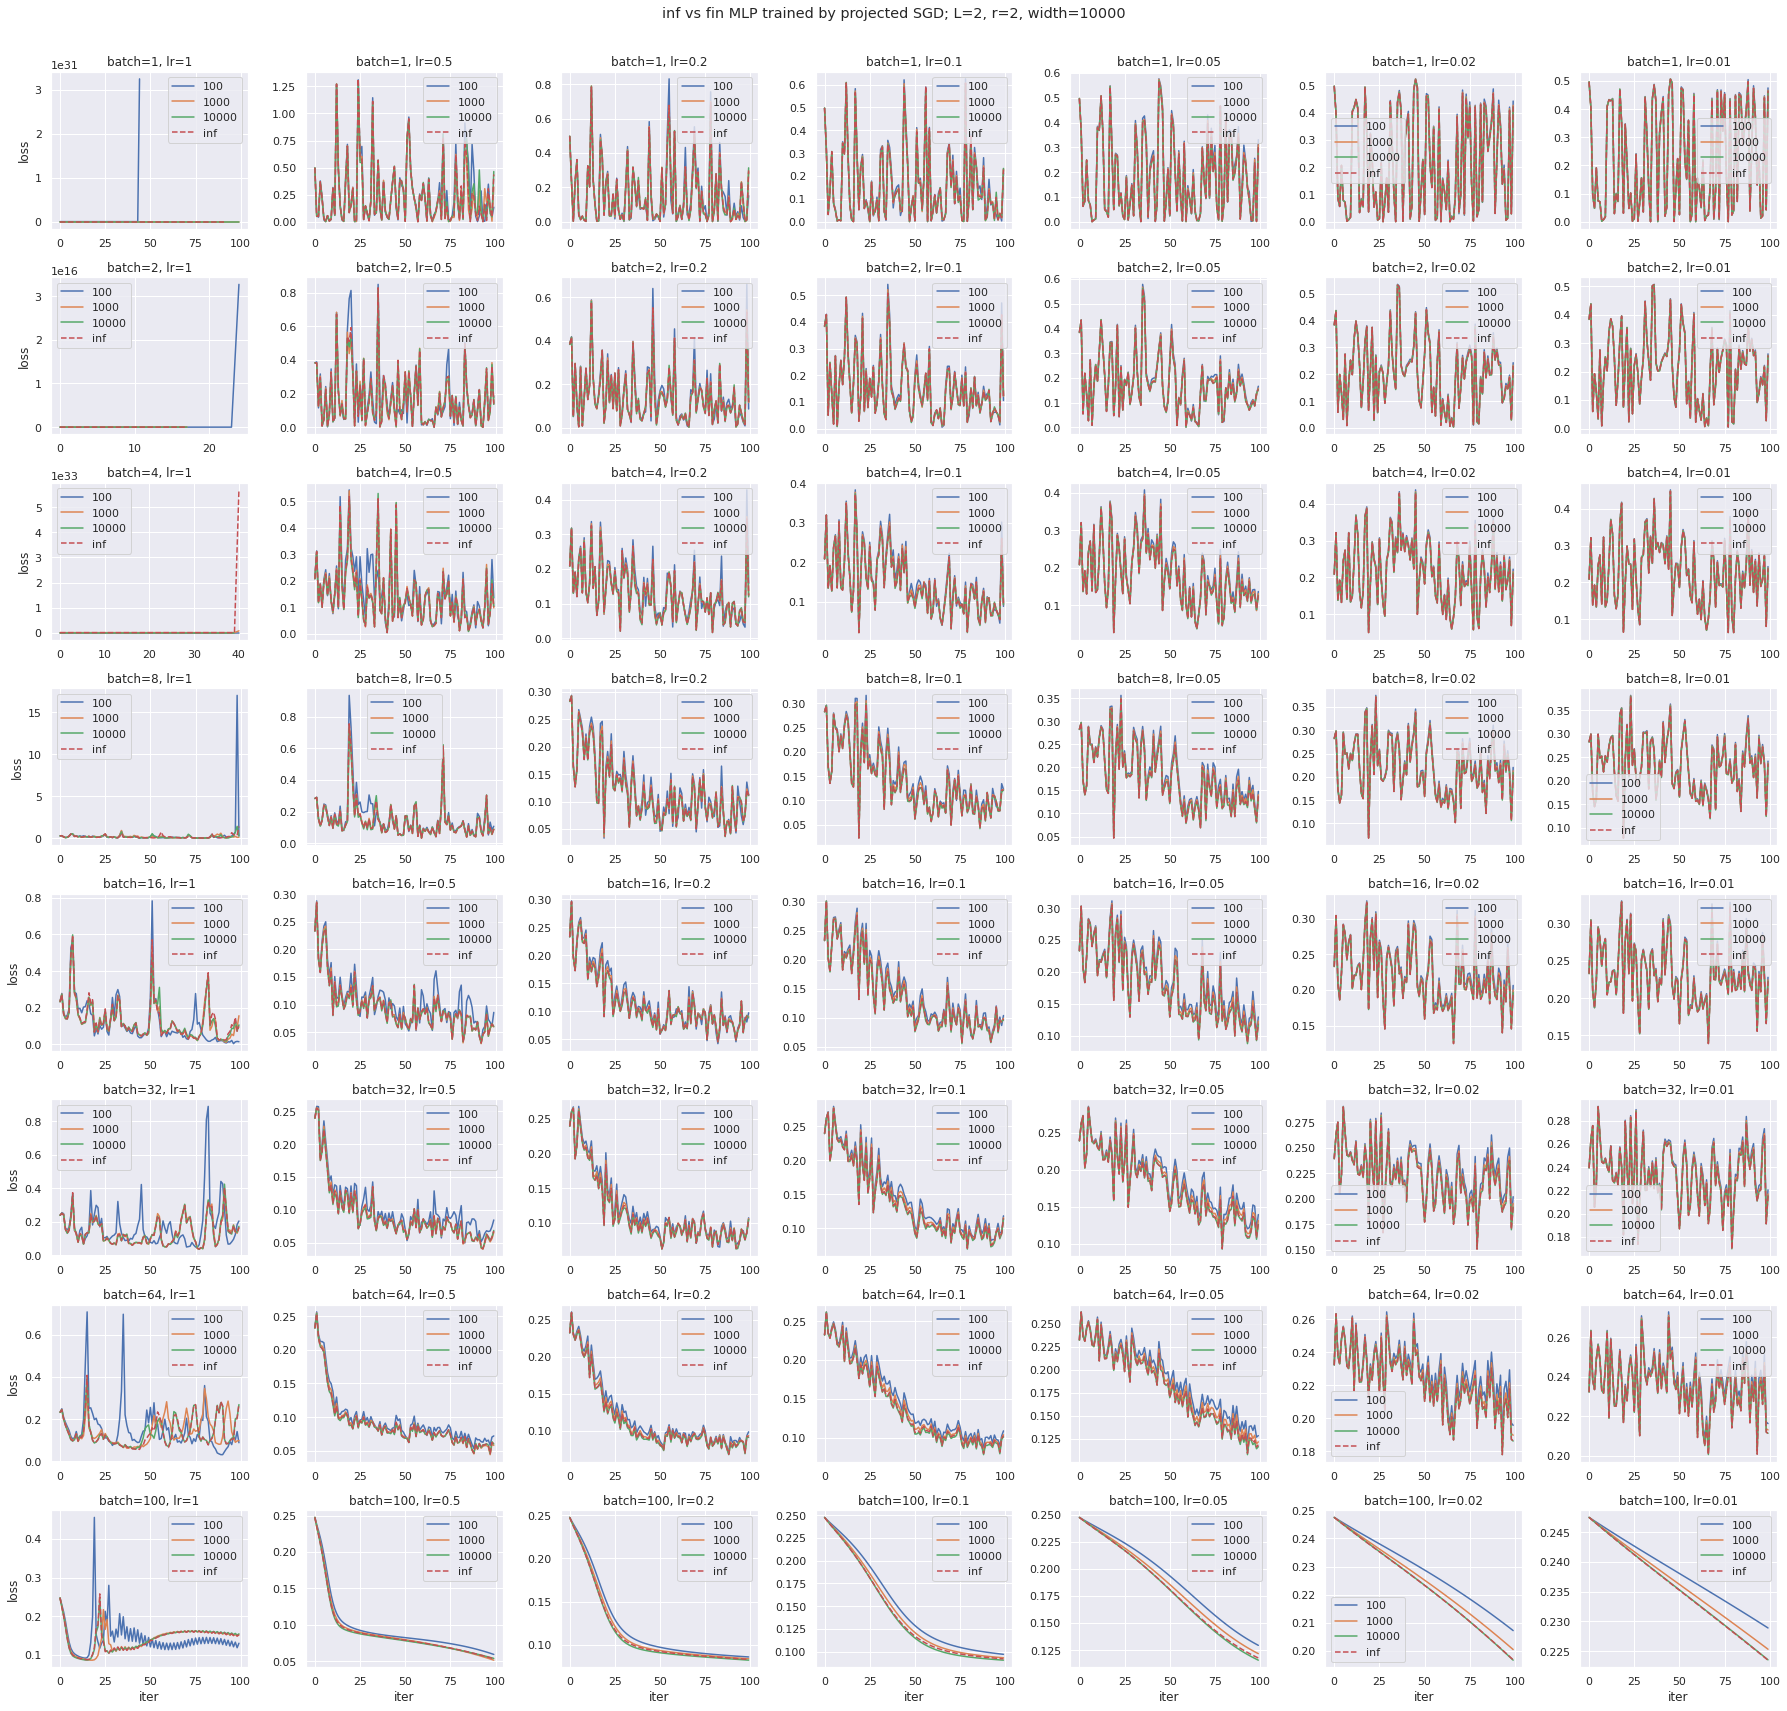

In [7]:
losses = {}
i = 1
T = 100
L = 2
rank = 2
fig = plt.figure(figsize=(25, 25))
for r, batch in tqdm(list(enumerate(batches)), desc='batch'):
  for c, lr in tqdm(list(enumerate(lrs)), desc='lr', leave=False):
    plt.subplot(len(batches), len(lrs), i)
    if c == 0:
      plt.ylabel('loss')
    if r == len(batches) - 1:
      plt.xlabel('iter')
    torch.manual_seed(1)
    np.random.seed(1)
    infnet = InfPiMLP(d=2, dout=1, L=L, r=rank, initbuffersize=1000, bias_alpha=1, quiet=True)
    # need to do finite net first, since record_pgdlim changes infnet
    for width in [100, 1000, 10000]:
      losses[(lr, batch, width)] = record_pgdfin(infnet, X, y, lr, width, T, cuda=True, center=True, batchsize=batch, seed=0)
      plt.plot(losses[(lr, batch, width)], label=str(width))
    if (lr, batch, np.inf) not in losses:
      losses[(lr, batch, np.inf)] = record_pgdlim(infnet, X, y, lr, T, cuda=True, batchsize=batch, seed=0)
    plt.plot(losses[(lr, batch, np.inf)], '--', label='inf')
    plt.legend()
    plt.title(f'batch={batch}, lr={lr}')
    i += 1
plt.suptitle(f'inf vs fin MLP trained by projected SGD; L={L}, r={rank}, width={width}')
tight_layout(plt)